In [1]:
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [2]:
path = r"/home/randd/Desktop/Desktop_Office/2024/February2024/FirstWeek/ActiveLearning/init_population/"
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
colors = []*0

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.png'):
          # adds only the image files to the flowers list
            colors.append(file.name)
            
len(colors)

860

In [3]:
train_colors, test_colors = colors[:int(len(colors)*0.8)], colors[int(len(colors)*0.8):]

In [4]:
# load the model first and pass as an argument
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [5]:
data = {}
p = r"/home/randd/Desktop/Desktop_Office/2024/February2024/FirstWeek/ActiveLearning/BaselineModelFiles/color_features_train.pkl"

# loop through each image in the dataset
for color in train_colors:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(path+color,model)
        data[color] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)
          
 

1/1 [==============================] - 0s 23ms/step


In [6]:
train_data = data

In [7]:
# get a list of the filenames
filenames = np.array(list(train_data.keys()))

# get a list of just the features
train_feat = np.array(list(train_data.values()))
print(train_feat.shape)

# reshape so that there are 210 samples of 4096 vectors
train_feat = train_feat.reshape(-1,4096)
print(train_feat.shape)

# get the unique labels (from the flower_labels.csv)
df = pd.read_csv('/home/randd/Desktop/Desktop_Office/2024/February2024/FirstWeek/ActiveLearning/segregated_files/init_df.csv')
label = df['color'].tolist()
unique_labels = list(set(label))

(688, 1, 4096)
(688, 4096)


In [8]:
pca = PCA(n_components=100, random_state=22)
pca.fit(train_feat)
x = pca.transform(train_feat)

In [9]:
kmeans = KMeans(n_clusters=10, random_state=22) # len(unique_labels)
kmeans.fit(x)
# Save to file in the current working directory
pkl_filename = "/home/randd/Desktop/Desktop_Office/2024/February2024/FirstWeek/ActiveLearning/BaselineModelFiles/init_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(kmeans, file)

/home/randd/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [10]:
kmeans.labels_

array([7, 4, 8, 8, 2, 5, 3, 2, 6, 6, 6, 2, 2, 1, 0, 9, 5, 4, 6, 8, 7, 0,
       6, 3, 5, 7, 4, 9, 5, 6, 0, 4, 1, 6, 4, 2, 0, 3, 5, 4, 5, 5, 7, 6,
       3, 1, 6, 3, 8, 8, 1, 5, 0, 8, 5, 7, 5, 1, 5, 5, 8, 8, 1, 9, 6, 5,
       1, 9, 0, 2, 8, 3, 7, 8, 9, 2, 3, 2, 8, 8, 6, 3, 7, 4, 0, 3, 9, 2,
       1, 1, 7, 2, 8, 0, 4, 5, 5, 3, 3, 6, 0, 5, 6, 6, 0, 6, 0, 3, 5, 8,
       4, 2, 9, 9, 1, 8, 8, 7, 5, 3, 5, 5, 6, 6, 6, 4, 5, 5, 2, 4, 0, 8,
       9, 6, 7, 7, 0, 6, 8, 4, 1, 9, 7, 0, 9, 1, 1, 4, 8, 9, 3, 5, 6, 3,
       5, 1, 8, 9, 3, 4, 0, 8, 7, 5, 4, 6, 7, 7, 7, 4, 3, 8, 2, 0, 5, 9,
       4, 5, 9, 0, 0, 2, 9, 3, 8, 7, 2, 4, 2, 5, 7, 9, 6, 3, 6, 2, 3, 5,
       3, 2, 0, 5, 3, 0, 0, 7, 5, 9, 2, 6, 5, 2, 9, 8, 3, 9, 7, 4, 2, 6,
       8, 9, 6, 7, 0, 2, 0, 4, 9, 7, 1, 5, 5, 9, 6, 3, 0, 4, 7, 3, 0, 6,
       2, 3, 9, 3, 5, 5, 3, 1, 0, 8, 1, 1, 0, 1, 9, 0, 5, 6, 7, 9, 4, 3,
       5, 0, 0, 1, 8, 6, 0, 1, 2, 0, 2, 4, 5, 0, 4, 9, 0, 7, 4, 8, 7, 8,
       0, 3, 4, 3, 4, 2, 1, 7, 4, 9, 0, 7, 8, 1, 2,

# Testing

In [11]:
test_data = {}
p = r"/home/randd/Desktop/Desktop_Office/2024/February2024/FirstWeek/ActiveLearning/BaselineModelFiles/test_features.pkl"

import tqdm

# ctr = 1
# loop through each image in the dataset
for color in test_colors:
    # try to extract the features and update the dictionary
    # print(ctr, end="\r")
    test_feat = extract_features(path+color,model)
    test_data[color] = test_feat
    # # if something fails, save the extracted features as a pickle file (optional)
    # except:
    #     with open(p,'wb') as file:
    #         pickle.dump(test_data,file)
    # ctr+=1
with open(p,'wb') as file:
    pickle.dump(test_data,file)

1/1 [==============================] - 0s 22ms/step


In [12]:
# get a list of the filenames
test_filenames = np.array(list(test_data.keys()))

# get a list of just the features
test_feat = np.array(list(test_data.values()))
print(test_feat.shape)

# reshape so that there are 210 samples of 4096 vectors
test_feat = test_feat.reshape(-1,4096)
print(test_feat.shape)

# get the unique labels (from the flower_labels.csv)
test_df = pd.read_csv('/home/randd/Desktop/Desktop_Office/2024/February2024/FirstWeek/ActiveLearning/segregated_files/init_df.csv')
test_label = test_df['color'].tolist()
test_unique_labels = list(set(test_label))

(172, 1, 4096)
(172, 4096)


In [13]:
pca = PCA(n_components=100, random_state=22)
x_test = pca.fit(test_feat)
test_x = pca.transform(test_feat)

In [14]:
# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)
groups

{7: ['5060.png',
  '6919.png',
  '4329.png',
  '8590.png',
  '6278.png',
  '4520.png',
  '4486.png',
  '5417.png',
  '658.png',
  '5268.png',
  '2166.png',
  '3347.png',
  '2704.png',
  '3963.png',
  '128.png',
  '3046.png',
  '1191.png',
  '2473.png',
  '7633.png',
  '5197.png',
  '6659.png',
  '8008.png',
  '4385.png',
  '1716.png',
  '4055.png',
  '1989.png',
  '6313.png',
  '220.png',
  '3197.png',
  '4386.png',
  '4940.png',
  '562.png',
  '4905.png',
  '7950.png',
  '6685.png',
  '3730.png',
  '5334.png',
  '3579.png',
  '6472.png',
  '8811.png',
  '2851.png',
  '1980.png',
  '2953.png',
  '6795.png',
  '9195.png',
  '3518.png',
  '4243.png',
  '4030.png',
  '1627.png',
  '9369.png',
  '8176.png',
  '710.png',
  '3444.png',
  '2667.png',
  '3704.png',
  '7995.png',
  '2980.png',
  '82.png',
  '1792.png',
  '7822.png',
  '3769.png',
  '8207.png',
  '4387.png',
  '9860.png',
  '1203.png',
  '1933.png',
  '1799.png',
  '50.png',
  '1098.png'],
 4: ['3116.png',
  '6776.png',
  '6182.

In [15]:
pkl_filename = "/home/randd/Desktop/Desktop_Office/2024/February2024/FirstWeek/ActiveLearning/BaselineModelFiles/init_model.pkl"

# Load from file
with open(pkl_filename, 'rb') as file:
    init_model = pickle.load(file)

init_model.fit(test_x)
print(init_model.labels_)

/home/randd/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[3 3 2 3 9 3 0 1 9 3 1 1 6 1 1 1 0 3 6 8 5 2 1 5 7 3 6 9 9 1 6 4 2 1 4 0 1
 9 2 4 8 9 0 2 1 0 0 3 8 4 7 2 7 9 2 6 5 5 2 2 7 9 4 8 5 6 4 1 0 8 1 1 3 4
 7 9 0 6 9 0 6 6 5 8 2 6 0 3 8 3 4 8 6 7 4 0 1 1 9 4 5 6 8 0 4 1 6 9 8 9 3
 8 0 8 8 2 7 5 6 5 7 7 9 0 1 1 2 8 6 0 1 2 6 7 8 5 5 1 5 2 2 1 4 6 2 0 6 6
 9 0 9 0 9 2 1 9 0 3 1 5 9 5 5 7 3 9 7 8 6 8 0 9]


In [16]:
# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(test_filenames,init_model.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [17]:
groups

{3: ['5017.png',
  '6527.png',
  '3368.png',
  '1632.png',
  '8209.png',
  '7673.png',
  '6018.png',
  '2090.png',
  '9330.png',
  '1219.png',
  '372.png',
  '9282.png',
  '8490.png',
  '4749.png'],
 2: ['2951.png',
  '1737.png',
  '1306.png',
  '7905.png',
  '4430.png',
  '2521.png',
  '2542.png',
  '311.png',
  '3799.png',
  '100.png',
  '3410.png',
  '7168.png',
  '6531.png',
  '8778.png',
  '9821.png',
  '3173.png',
  '5997.png'],
 9: ['4788.png',
  '3759.png',
  '3039.png',
  '891.png',
  '921.png',
  '3121.png',
  '9975.png',
  '8758.png',
  '4392.png',
  '2197.png',
  '9670.png',
  '2961.png',
  '8661.png',
  '1495.png',
  '1575.png',
  '2161.png',
  '2357.png',
  '3746.png',
  '8464.png',
  '865.png',
  '1556.png'],
 0: ['7395.png',
  '6681.png',
  '6733.png',
  '7900.png',
  '2322.png',
  '9577.png',
  '9047.png',
  '1789.png',
  '1432.png',
  '3143.png',
  '5394.png',
  '9621.png',
  '281.png',
  '1958.png',
  '844.png',
  '1056.png',
  '8037.png',
  '2751.png',
  '8217.png',

In [18]:
pkl_filename = "/home/randd/Desktop/Desktop_Office/2024/February2024/FirstWeek/ActiveLearning/BaselineModelFiles/predicted_op.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(groups, file)

In [19]:
predictedclass = {"name":[], "color":[]}

for i in groups.keys():
    for name in groups[i]:
        predictedclass["name"].append(name)
        predictedclass["color"].append(i)

predictedclassdf = pd.DataFrame(predictedclass)
predictedclassdf       

,name,color
0,5017.png,3
1,6527.png,3
2,3368.png,3
3,1632.png,3
4,8209.png,3
...,...,...
167,8160.png,4
168,3469.png,4
169,7521.png,4
170,4884.png,4


In [20]:
predictedclassdf.to_csv("/home/randd/Desktop/Desktop_Office/2024/February2024/FirstWeek/ActiveLearning/BaselineModelFiles/predclass.csv")

In [21]:
groups.keys()

dict_keys([3, 2, 9, 0, 1, 6, 8, 5, 7, 4])

0 - Red
1 - Pink
2 - Blue
3 - Orange
4 - Black
5 - Green
6 - White
7 - Gray
8 - Purple
9 - Yellow

In [22]:
colorkeys = {0 : "Red",
1 : "Pink",
2 : "Blue",
3 : "Orange",
4 : "Black",
5 : "Green",
6 : "White",
7 : "Gray",
8 : "Purple",
9 : "Yellow"}

3 Orange 5017.png


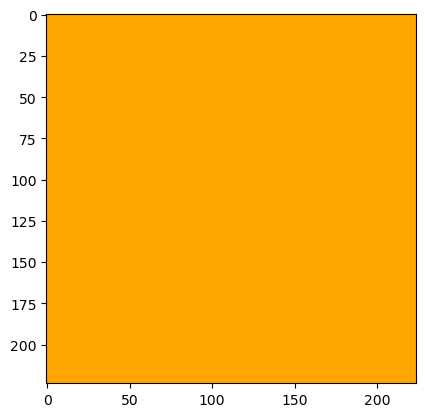

2 Blue 2951.png


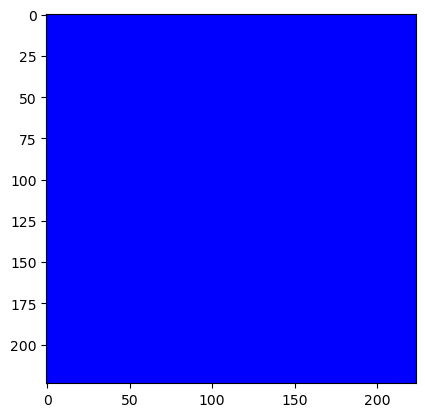

9 Yellow 4788.png


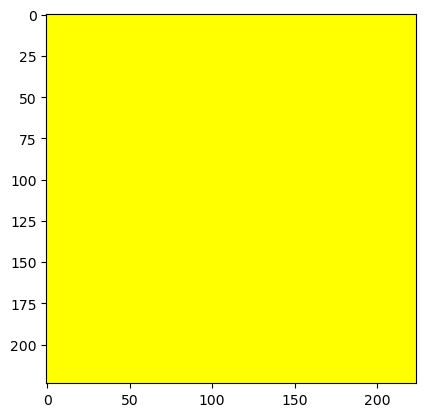

0 Red 7395.png


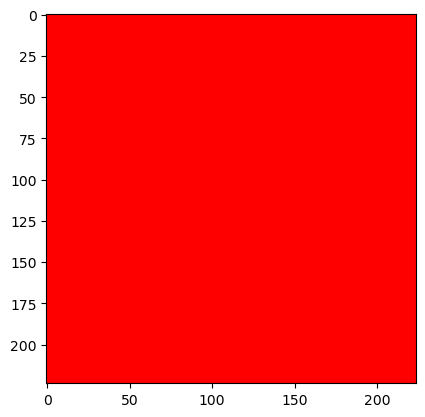

1 Pink 9773.png


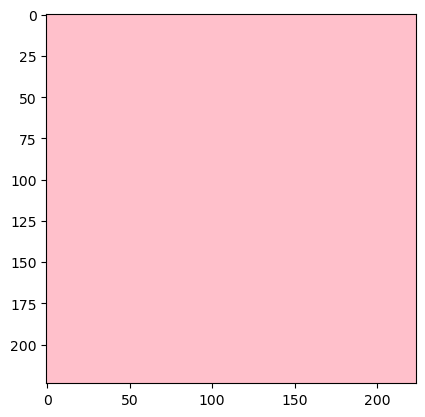

6 White 5543.png


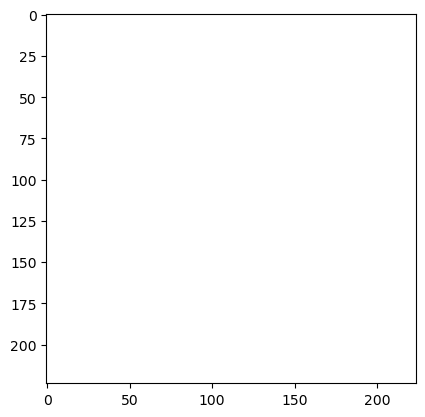

8 Purple 9067.png


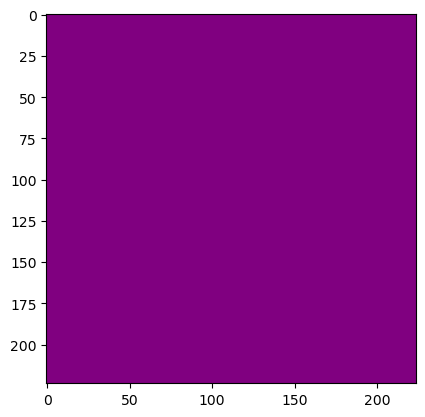

5 Green 9459.png


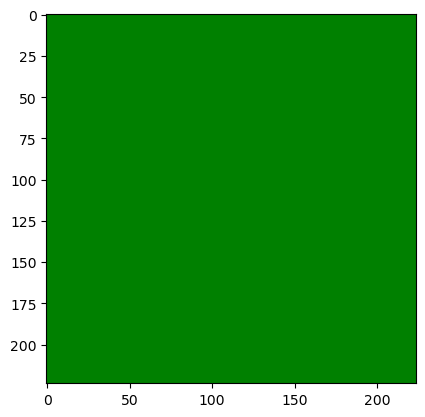

7 Gray 5518.png


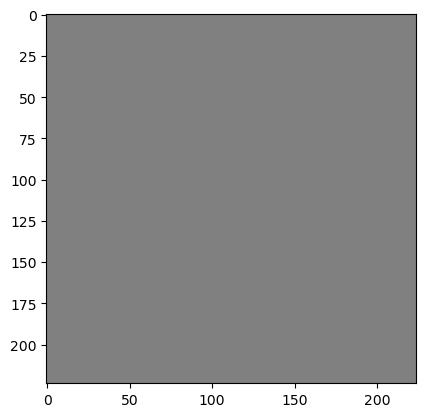

4 Black 3563.png


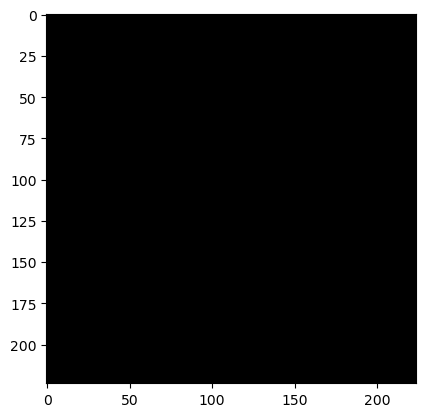

In [23]:
for i in groups.keys():
    print(i, colorkeys[i], groups[i][0])
    img = load_img(path+groups[i][0], target_size=(224,224))
    plt.imshow(img)
    plt.show()

In [25]:
newpredictedclassdf = predictedclassdf
newpredictedclassdf

,name,color
0,5017.png,3
1,6527.png,3
2,3368.png,3
3,1632.png,3
4,8209.png,3
...,...,...
167,8160.png,4
168,3469.png,4
169,7521.png,4
170,4884.png,4


In [26]:
newpredictedclassdf['color'] = newpredictedclassdf['color'].replace(colorkeys)
newpredictedclassdf

,name,color
0,5017.png,Orange
1,6527.png,Orange
2,3368.png,Orange
3,1632.png,Orange
4,8209.png,Orange
...,...,...
167,8160.png,Black
168,3469.png,Black
169,7521.png,Black
170,4884.png,Black


# Confidence

In [37]:
import ast
test_list = [ast.literal_eval(s.replace('.png', '')) for s in newpredictedclassdf.name.to_list()]
test_list

[5017,
 6527,
 3368,
 1632,
 8209,
 7673,
 6018,
 2090,
 9330,
 1219,
 372,
 9282,
 8490,
 4749,
 2951,
 1737,
 1306,
 7905,
 4430,
 2521,
 2542,
 311,
 3799,
 100,
 3410,
 7168,
 6531,
 8778,
 9821,
 3173,
 5997,
 4788,
 3759,
 3039,
 891,
 921,
 3121,
 9975,
 8758,
 4392,
 2197,
 9670,
 2961,
 8661,
 1495,
 1575,
 2161,
 2357,
 3746,
 8464,
 865,
 1556,
 7395,
 6681,
 6733,
 7900,
 2322,
 9577,
 9047,
 1789,
 1432,
 3143,
 5394,
 9621,
 281,
 1958,
 844,
 1056,
 8037,
 2751,
 8217,
 3791,
 9773,
 784,
 1807,
 8720,
 3402,
 9320,
 3744,
 4324,
 5712,
 3185,
 6289,
 1885,
 7273,
 7956,
 8060,
 7254,
 7712,
 9023,
 894,
 3745,
 8022,
 3017,
 5862,
 5875,
 5543,
 5750,
 482,
 7742,
 4930,
 4886,
 8596,
 1493,
 7811,
 5760,
 6263,
 5443,
 1945,
 7801,
 3269,
 1978,
 6887,
 5867,
 1241,
 514,
 9067,
 4575,
 1653,
 2025,
 4765,
 3042,
 8762,
 7771,
 1171,
 489,
 8391,
 5006,
 3864,
 982,
 7544,
 3123,
 8529,
 9459,
 2528,
 7380,
 984,
 5980,
 840,
 3822,
 4502,
 8546,
 1769,
 4506,
 5669,
 

In [39]:
Ground_Truth = pd.read_csv("/home/randd/Desktop/Desktop_Office/2024/February2024/FirstWeek/ActiveLearning/segregated_files/init_df.csv")
Ground_Truth = Ground_Truth[Ground_Truth["name"].isin(test_list)]
Ground_Truth = Ground_Truth.drop(columns=["Unnamed: 0"])
Ground_Truth

,name,color
7,8537,black
14,8160,black
31,6079,black
43,466,black
57,2764,black
...,...,...
829,2961,yellow
837,1556,yellow
838,891,yellow
848,9670,yellow


In [47]:
colorvals = {"Red" : 0,
"Pink" : 1,
"Blue" : 2,
"Orange" : 3,
"Black" : 4,
"Green" : 5,
"White" : 6,
"Gray" : 7,
"Purple" : 8,
"Yellow": 9,
"red" : 0,
"pink" : 1,
"blue" : 2,
"orange" : 3,
"black" : 4,
"green" : 5,
"white" : 6,
"gray" : 7,
"purple" : 8,
"yellow": 9}

In [56]:
from sklearn.metrics import mean_absolute_error

PT = newpredictedclassdf
PT["name"] = test_list
PT = newpredictedclassdf.sort_values(by="name")
GT = Ground_Truth.sort_values(by="name")
GT["color"], PT["color"] = GT["color"].replace(colorvals), PT["color"].replace(colorvals)


In [57]:
GT

,name,color
157,100,2
196,237,7
602,281,0
99,311,2
356,372,3
...,...,...
620,9621,0
848,9670,9
496,9773,1
109,9821,2


In [58]:
PT

,name,color
23,100,2
153,237,7
64,281,0
21,311,2
10,372,3
...,...,...
63,9621,0
41,9670,9
72,9773,1
28,9821,2


In [59]:
mae_values = mean_absolute_error(GT, PT, multioutput='raw_values')
for column, mae in zip(GT.columns, mae_values):
    print(f'MAE for column {column}: {mae}')

MAE for column name: 0.0
MAE for column color: 0.0


: 